In [430]:
import pandas as pd

First we import the data table which is in ASCII format saved as a .txt file. The actual table we want only starts from the 40th row, and we will only use specific columns from that table which are listed below.

In [431]:
df = pd.read_fwf('/Users/maheshworpaudel/Downloads/mass16round.txt', 
                 skiprows=39,
                 usecols=(1,2,3,8),
                 names=('N', 'Z', 'A', 'Binding Energy/A'))
df

,N,Z,A,Binding Energy/A
0,1,0,1.0,0.0
1,0,1,NaN,0.0
2,1,1,2.0,1112.283
3,2,1,3.0,2827.265
4,1,2,NaN,2572.680
...,...,...,...,...
3431,76,17,NaN,7095#
3432,75,18,NaN,7077#
3433,77,17,94.0,7092#
3434,76,18,NaN,7079#


We can see that column number A has NaN values where the values have not been assigned. Let us drop those entries.

In [432]:
df = df.dropna()

In [433]:
df

,N,Z,A,Binding Energy/A
0,1,0,1.0,0.0
2,1,1,2.0,1112.283
3,2,1,3.0,2827.265
6,3,1,4.0,1720
9,4,1,5.0,1336
...,...,...,...,...
3425,76,15,91.0,7130#
3428,76,16,92.0,7116#
3430,77,16,93.0,7111#
3433,77,17,94.0,7092#


But we see that some of the binding energy per nucleon are not proper numbers. In fact the document says 'decimal point is replaced by # for (non-experimental) estimated values.' We will drop these values. To do that we will convert that column to numeric column which will render the illegal values to NaN, then we will drop the rows with NaN values.

In [434]:
df['Binding Energy/A'] = pd.to_numeric(df['Binding Energy/A'], errors='coerce')

/var/folders/vm/k3nb3s856jg_tk2_qtm8f8ch0000gn/T/ipykernel_3568/2242765098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binding Energy/A'] = pd.to_numeric(df['Binding Energy/A'], errors='coerce')


You can see that the illegal values have been converted to NaN values.

In [435]:
df

,N,Z,A,Binding Energy/A
0,1,0,1.0,0.000
2,1,1,2.0,1112.283
3,2,1,3.0,2827.265
6,3,1,4.0,1720.000
9,4,1,5.0,1336.000
...,...,...,...,...
3425,76,15,91.0,NaN
3428,76,16,92.0,NaN
3430,77,16,93.0,NaN
3433,77,17,94.0,NaN


Now we will drop the rows with NaN values.

In [436]:
df = df.dropna()

In [437]:
df

,N,Z,A,Binding Energy/A
0,1,0,1.0,0.000
2,1,1,2.0,1112.283
3,2,1,3.0,2827.265
6,3,1,4.0,1720.000
9,4,1,5.0,1336.000
13,5,1,6.0,960.000
23,6,2,8.0,3924.520
28,7,2,9.0,3349.000
33,8,2,10.0,2995.000
39,8,3,11.0,4155.380


I found that mass number column $``A"$ does not have values in ascending order. We will arrange the table in ascending order of $A$.

In [438]:
df = df.sort_values(by=['A'])

In [439]:
df

,N,Z,A,Binding Energy/A
0,1,0,1.0,0.000
2,1,1,2.0,1112.283
3,2,1,3.0,2827.265
6,3,1,4.0,1720.000
9,4,1,5.0,1336.000
13,5,1,6.0,960.000
23,6,2,8.0,3924.520
28,7,2,9.0,3349.000
33,8,2,10.0,2995.000
39,8,3,11.0,4155.380


The binding energy per nucleon can be written as 
$$\frac{E_{\rm B}}{A}=a_{\rm {V}}+a_{\rm {S}}A^{-1/3}+a_{\rm {C}}{\frac {Z(Z-1)}{A^{4/3}}}+a_{\rm {A}}{\frac {(N-Z)^{2}}{A^2}}+a_p A^{-3/2}$$
Let us consider $A$ is the input variable and $a_{\rm V}, a_{\rm S}, a_{\rm C}, a_{\rm A}$ and $a_{\rm p}$ are the coefficients to be determined.
Consider 
$$
\begin{align}
    a_{\rm V} &=& a_1 \\ 
    a_{\rm S} &=& a_2 \\
    a_{\rm C} &=& a_3 \\
    a_{\rm A} &=& a_4 \\
    a_{\rm p} &=& a_5 \\
    \frac{E_{\rm B}}{A} &=& y.
\end{align}
$$
We can construct a $n \times 5$ matrix which we write as ${X}$ where each columns of the matrix are values $1, A^{-1/3},{\frac {Z(Z-1)}{A^{4/3}}},{\frac {(N-Z)^{2}}{A^2}}, {\rm and\ } A^{-3/2}$. $n$ is the number of data points we have which is 55. Similarly we can construct $m \times 1$ vectors, $\vec{y}$ and $\vec{c}$, where the elements of $\vec{y}$ are $\frac{E_{\rm B}}{A}$ and 
$$
\vec{c}=
\begin{bmatrix} 
a_1\\
a_2\\
a_3\\                      
a_4\\
a_5
\end{bmatrix}
$$  
Then essentially we are performing polynomial regression of equation $\vec{y} = X\vec{c}$

First we create a $X$.

In [440]:
N = df['N'].to_numpy()
Z = df['Z'].to_numpy()
A = df['A'].to_numpy()
y = df['Binding Energy/A'].to_numpy()/1000 # I am using the dimension of energy in MeV.
print(y.shape)
print(y)

(29,)
[0.       1.112283 2.827265 1.72     1.336    0.96     3.92452  3.349
 2.995    4.15538  3.7916   3.508    4.994    4.541    4.285    5.27
 4.977    4.72     5.421    6.497    6.444    7.57935  7.56924  7.57654
 7.55924  8.11041  7.50654  7.47894  7.46672 ]


In [441]:
X = np.ones((len(y), 5))
X[:, 0] = 1
X[:, 1] = A**(-1/3)
X[:, 2] = Z*(Z-1)/A**(4/3)
X[:, 3] = ((N-Z)**2)/A**2
X[:, 4] = A**(-3/2)
print(X[:5])
print(X.shape)

[[1.         1.         0.         1.         1.        ]
 [1.         0.79370053 0.         0.         0.35355339]
 [1.         0.69336127 0.         0.11111111 0.19245009]
 [1.         0.62996052 0.         0.25       0.125     ]
 [1.         0.58480355 0.         0.36       0.08944272]]
(29, 5)


In [442]:
n = len(y)
n

29

In [443]:
import matplotlib.pyplot as plt

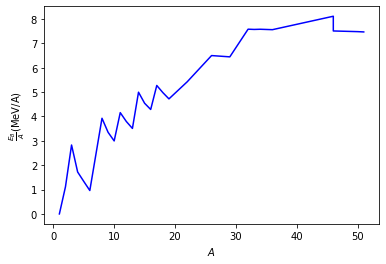

In [449]:
plt.plot(A, y, 'b-')
plt.xlabel(r'$A$')
plt.ylabel(r'$\frac{E_B}{A}$(MeV/A)')
plt.show()
plt.show()

We can now use the scikit library to perform polynomial fit.

In [447]:
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [448]:
model = skl.LinearRegression()
reg = model.fit(X, y)
a1, a2, a3, a4, a5 = reg.coef_
y_from_fit = reg.predict(X)
print(a1, a2, a3, a4, a5)
print(y_from_fit)
print(r'RMSE=', mean_squared_error(y, y_from_fit, squared=False))
print(r'MAE=', mean_absolute_error(y, y_from_fit))
print(r'$R^2=$',r2_score(y, y_from_fit))

0.0 -15.9146581376829 0.043419837853031495 -1.362561947612564 6.237106013469953
[0.23493421 0.84872573 1.28937647 1.68843965 2.03544116 2.33567261
 3.25814995 3.43917746 3.59886138 4.0192007  4.1425647  4.25322418
 4.55608774 4.6466805  4.72904969 4.96348814 5.03340248 5.09764293
 5.39543149 5.78005613 5.97401514 7.14718608 7.3121937  7.33277811
 7.49033898 6.67750538 8.02045993 8.16112154 8.2138218 ]
RMSE= 0.6275192760849303
MAE= 0.48463824717250104
$R^2=$ 0.9267026472231495


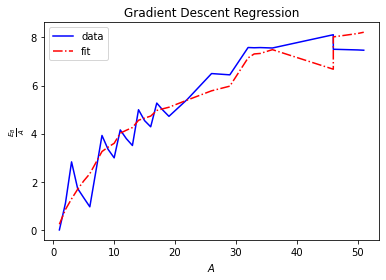

In [456]:
plt.plot(A, y, 'b-', label='data')
plt.plot(A, y_from_fit, 'r-.', label='fit')
plt.xlabel(r'$A$')
plt.ylabel(r'$\frac{E_B}{A}$')
plt.legend(loc='best')
plt.title("Gradient Descent Regression")
plt.show()

## In the spirit of machine learning jargon:

In [451]:
from sklearn.model_selection import train_test_split 
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(23, 5)
(6, 5)
(23,)
(6,)


In [452]:
model_train = skl.LinearRegression()
reg_train = model_train.fit(X_train, Y_train)
a1, a2, a3, a4, a5 = reg_train.coef_
y_train_predict = reg_train.predict(X_train) 

print(a1, a2, a3, a4, a5)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(mean_squared_error(Y_train, y_train_predict, squared=False)))
print('R2 score is {}'.format(r2_score(Y_train, y_train_predict)))
print('\n')

y_test_predict = reg_train.predict(X_test) 

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(mean_squared_error(Y_test, y_test_predict, squared=False)))
print('R2 score is {}'.format(r2_score(Y_test, y_test_predict)))

0.0 -16.954616840004377 0.05943259260309475 -2.3548888819298153 7.459408157307695
The model performance for training set
--------------------------------------
RMSE is 0.6253124776122847
R2 score is 0.9243941231827375


The model performance for test set
--------------------------------------
RMSE is 0.787328014265682
R2 score is 0.8149740230751142


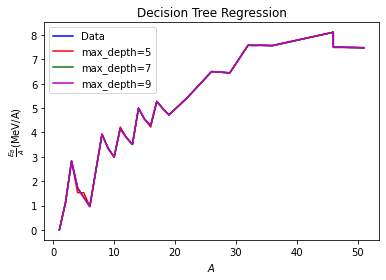

In [460]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regr_1=DecisionTreeRegressor(max_depth=5)
regr_2=DecisionTreeRegressor(max_depth=7)
regr_3=DecisionTreeRegressor(max_depth=9)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)


y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)

# Plot the results
plt.figure()
plt.plot(A, y, color="blue", label="Data")
plt.plot(A, y_1, color="red", label="max_depth=5")
plt.plot(A, y_2, color="green", label="max_depth=7")
plt.plot(A, y_3, color="m", label="max_depth=9")

plt.xlabel(r"$A$")
plt.ylabel(r"$\frac{E_B}{A}$(MeV/A)")
plt.title(r"Decision Tree Regression")
plt.legend()
plt.show()